In [4]:
import snscrape
import snscrape.modules.twitter as sn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
#Dati ipsos

E22 = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/politiche italiane/Elezioni2022.csv')
E22['Risultati_U35'] = [5.2 , 15.8 , 8.5 , 8.1 , 6.4  , 18.7 , 20.9]
E18 = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/politiche italiane/Elezioni2018.csv')
E18['Risultati_U35'] = [3.3 , 12.4 , 17.8 , 15.3 , 35.3]

E22['Year'] = 2022
E18['Year'] = 2018
tot = pd.merge(E22 , E18 ,how = 'outer')

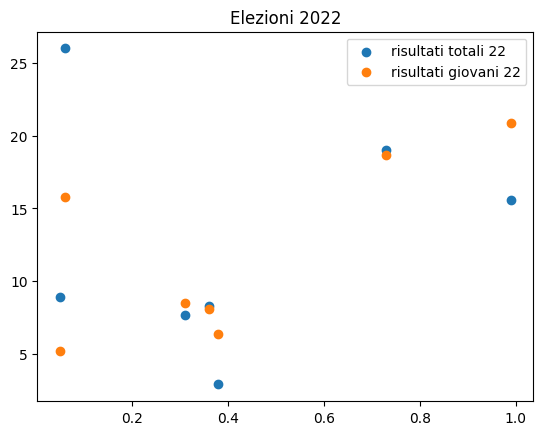

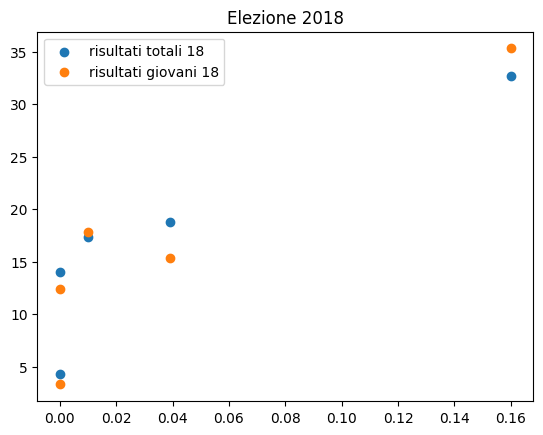

In [6]:
plt.scatter(E22['Tweet_p'] , E22.Risultati , label = 'risultati totali 22')
plt.scatter(E22['Tweet_p'] , E22.Risultati_U35 , label = 'risultati giovani 22')
plt.title('Elezioni 2022')
plt.legend()
plt.show()


plt.scatter(E18['Tweet_p'] , E18.Risultati , label = 'risultati totali 18')
plt.scatter(E18['Tweet_p'] , E18.Risultati_U35 , label = 'risultati giovani 18')
plt.title('Elezione 2018')
plt.legend()



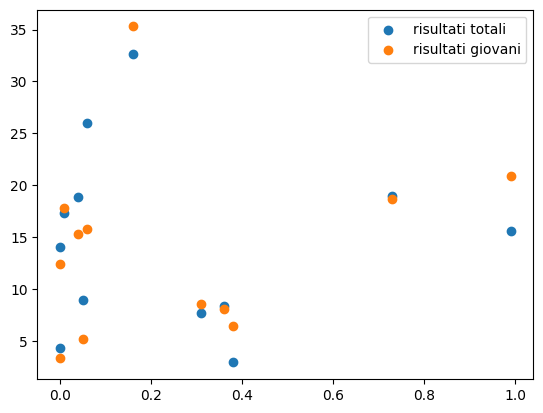

In [7]:
plt.scatter(tot['Tweet_p'] , tot.Risultati , label = 'risultati totali')
plt.scatter(tot['Tweet_p'] , tot.Risultati_U35 , label = 'risultati giovani')
plt.legend()
plt.show()

In [8]:
print(tot.corr() , '\n'
,E22.corr() , '\n'
,E18.corr())

               Risultati   Tweet_p  Risultati_U35      Year
Risultati       1.000000 -0.040694       0.897599 -0.279173
Tweet_p        -0.040694  1.000000       0.218552  0.596150
Risultati_U35   0.897599  0.218552       1.000000 -0.284017
Year           -0.279173  0.596150      -0.284017  1.000000 
                Risultati   Tweet_p  Risultati_U35  Year
Risultati       1.000000  0.087173       0.769058   NaN
Tweet_p         0.087173  1.000000       0.697651   NaN
Risultati_U35   0.769058  0.697651       1.000000   NaN
Year                 NaN       NaN            NaN   NaN 
                Risultati   Tweet_p  Risultati_U35  Year
Risultati       1.000000  0.895920       0.986899   NaN
Tweet_p         0.895920  1.000000       0.914216   NaN
Risultati_U35   0.986899  0.914216       1.000000   NaN
Year                 NaN       NaN            NaN   NaN


In [9]:
tot.to_csv('Italia.csv' , index = False)

[Year
 2018    0.914216
 2022    0.697651
 Name: Tweet_p, dtype: float64,
 Year
 2018    0.895920
 2022    0.087173
 Name: Tweet_p, dtype: float64]

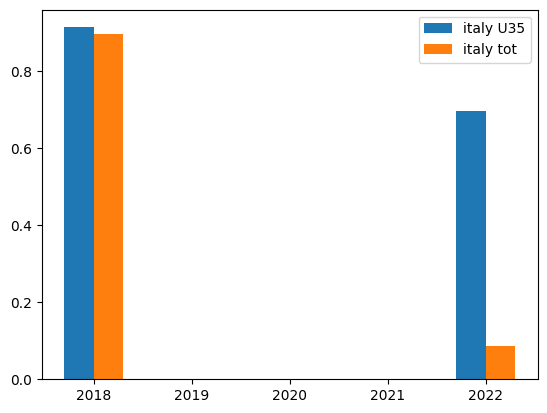

In [10]:
pippo = tot.groupby('Year')
calippo = [pippo.Tweet_p.corr(tot.Risultati_U35) , pippo.Tweet_p.corr(tot.Risultati)]

fig , ax = plt.subplots()
width = 0.3
r1 = ax.bar(calippo[0].index - width/2 , calippo[0] , width , label = 'italy U35')
r2 = ax.bar(calippo[1].index + width/2 , calippo[1] , width , label = 'italy tot')

plt.legend()

calippo